Fish Model Libraries to be used

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

Data Loading

In [ ]:
data = pd.read_csv('Fish.csv')
data.head()

--2024-02-16 14:07:02--  https://download2298.mediafire.com/msv23eos2lbg0aG--eQQpessw67EQRQJq6XaUcVFab6qgtp9RyugBMUxnh88zw14JtGkVGDPueurhD8hWkV-_ILGMCktv5plsmRhYZXrydv4FUlRErJBBJLWRgDrG5PLmnebVgs3GbVelvH83XgKMkXElTxk7hCbaJzZorzVNAbXlz0/zwo06o2v466cvlc/Fish.csv
Resolving download2298.mediafire.com (download2298.mediafire.com)... 199.91.155.39
Connecting to download2298.mediafire.com (download2298.mediafire.com)|199.91.155.39|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.mediafire.com/download_repair.php?flag=9&dkey=msv23eos2lbg0aG%2D%2DeQQpessw67EQRQJq6XaUcVFab6qgtp9RyugBMUxnh88zw14JtGkVGDPueurhD8hWkV%2D%5FILGMCktv5plsmRhYZXrydv4FUlRErJBBJLWRgDrG5PLmnebVgs3GbVelvH83XgKMkXElTxk7hCbaJzZorzVNAbXlz0&qkey=zwo06o2v466cvlc&ip=34%2E66%2E213%2E237 [following]
--2024-02-16 14:07:02--  https://www.mediafire.com/download_repair.php?flag=9&dkey=msv23eos2lbg0aG%2D%2DeQQpessw67EQRQJq6XaUcVFab6qgtp9RyugBMUxnh88zw14JtGkVGDPueurhD8hWkV%2D%5FILGMCktv5plsmRhYZXr

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 24


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Preprocessing Stage

In [ ]:
y = data['Species']
X = data.drop('Species', axis=1)

In [ ]:
print(X)
print(X.shape)

     Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936
155    13.4     11.7     12.4     13.5   2.4300  1.2690
156    12.2     12.1     13.0     13.8   2.2770  1.2558
157    19.7     13.2     14.3     15.2   2.8728  2.0672
158    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]
(159, 6)


Centering the data using StandardScaler

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X)

       Weight   Length1   Length2   Length3    Height     Width
0   -0.438072 -0.305789 -0.282303 -0.106020  0.596579 -0.236529
1   -0.303562 -0.225507 -0.198054 -0.002337  0.821261 -0.066579
2   -0.163448 -0.235542 -0.179332 -0.010977  0.797341  0.165793
3   -0.098995  0.005302  0.054694  0.196390  0.879771  0.022621
4    0.088759  0.025372  0.054694  0.239592  0.812835  0.426371
..        ...       ...       ...       ...       ...       ...
154 -1.082039 -1.479903 -1.517960 -1.540309 -1.610359 -1.799403
155 -1.078676 -1.459833 -1.499238 -1.531669 -1.530878 -1.873547
156 -1.082039 -1.419692 -1.443072 -1.505748 -1.566687 -1.881402
157 -1.061022 -1.309305 -1.321378 -1.384784 -1.427243 -1.398568
158 -1.060461 -1.249094 -1.255851 -1.298381 -1.413341 -1.510440

[159 rows x 6 columns]


Giving each fish its specific Class type

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
fish_class = {index: label for index, label in enumerate(encoder.classes_)}
fish_class

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

Train/Test Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_model.score(X_test, y_test)

CNN + Testing

In [ ]:
inputs = tf.keras.Input(shape=(6,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

fish_model = tf.keras.Model(inputs=inputs, outputs=outputs)

fish_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
epoch_nb = 1000
training = fish_model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=epoch_nb, verbose=1)

Epoch 1/1000
4/4 [==============================] - 2s 166ms/step - loss: 2.1215 - accuracy: 0.0792 - val_loss: 1.8648 - val_accuracy: 0.0769
Epoch 2/1000
4/4 [==============================] - 0s 32ms/step - loss: 2.0629 - accuracy: 0.0693 - val_loss: 1.8242 - val_accuracy: 0.0769
Epoch 3/1000
4/4 [==============================] - 0s 22ms/step - loss: 2.0087 - accuracy: 0.0693 - val_loss: 1.7841 - val_accuracy: 0.0769
Epoch 4/1000
4/4 [==============================] - 0s 30ms/step - loss: 1.9585 - accuracy: 0.0693 - val_loss: 1.7468 - val_accuracy: 0.0385
Epoch 5/1000
4/4 [==============================] - 0s 24ms/step - loss: 1.9166 - accuracy: 0.0693 - val_loss: 1.7126 - val_accuracy: 0.0385
Epoch 6/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.8765 - accuracy: 0.0990 - val_loss: 1.6809 - val_accuracy: 0.1154
Epoch 7/1000
4/4 [==============================] - 0s 27ms/step - loss: 1.8426 - accuracy: 0.0990 - val_loss: 1.6505 - val_accuracy: 0.1538
Epoch 8/1000

Model Evaluation

In [ ]:
fish_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 82ms/step - loss: 0.2961 - accuracy: 0.9062


[0.2961447834968567, 0.90625]

Visualization Details of Training/Validation

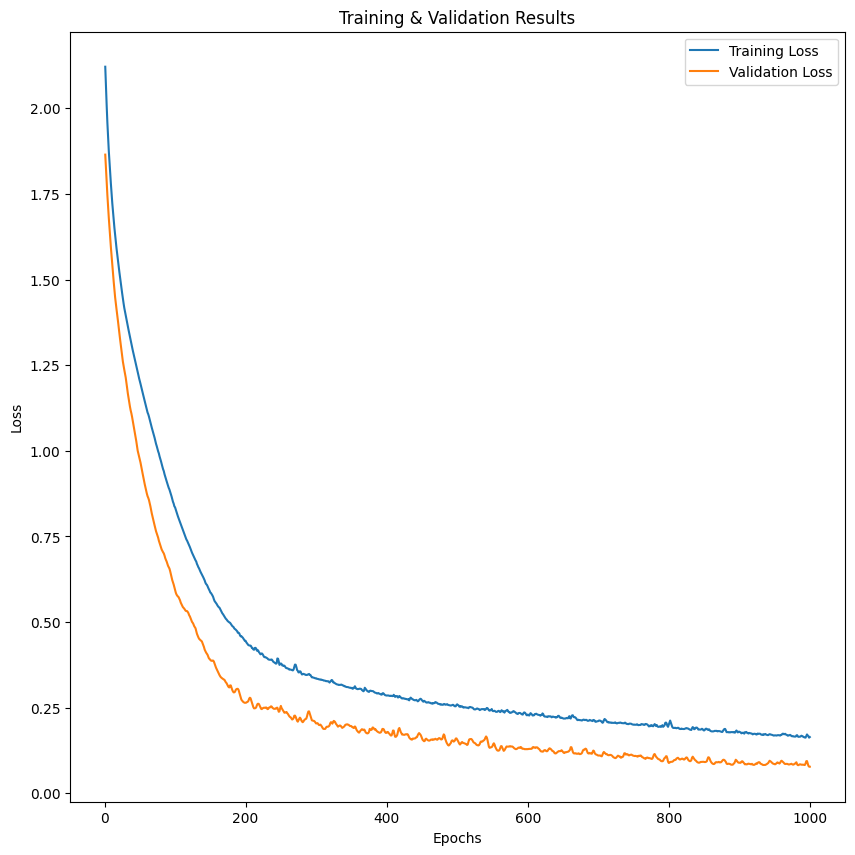

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Training & Validation Results")
epochs_x = range(1, epoch_nb + 1)
training_loss = training.history['loss']
val_loss = training.history['val_loss']
plt.plot(epochs_x, training_loss, label="Training Loss")
plt.plot(epochs_x, val_loss, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()